# Import Modules

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Loding the dataset

In [3]:
df = pd.read_csv('Twitter Sentiment.csv') # label 1 is Negative sentiment and label 0 is positive sentiment
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing of dataset

In [5]:
# Remove patterns in the text
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
# Remove twitter handles (@ symbols)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],'@[\w]*')

df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause they...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# Remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace('[^a-zA-Z#]', ' ')
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause they...,thanks for #lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
# Removing Short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,thanks for #lyft credit i can't use cause they...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
# Combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,thanks for #lyft credit i can't use cause they...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Data Analysis

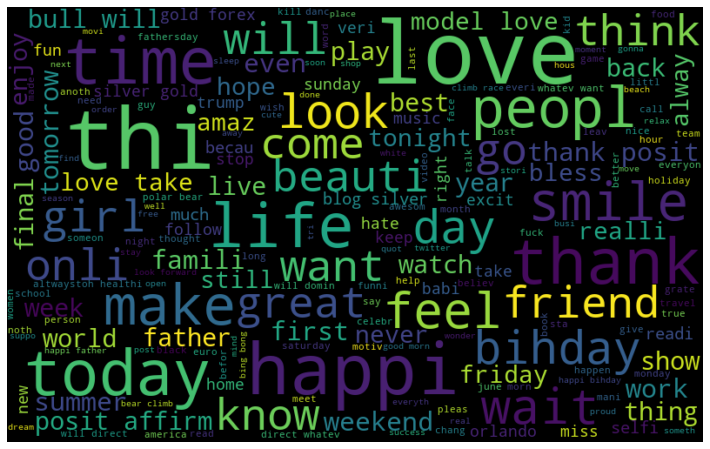

In [13]:
# visualize the frequent words
all_words = ' '.join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud_ = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_,interpolation='bilinear')
plt.axis('off')
plt.show()

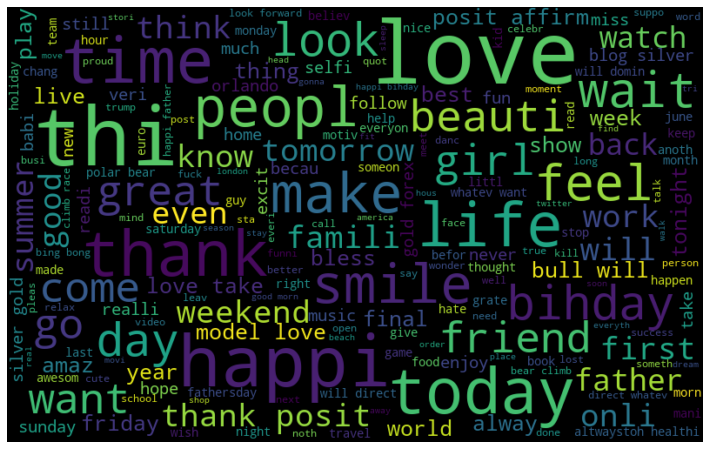

In [14]:
# frequent words visualization for positive
all_words = ' '.join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud_ = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_,interpolation='bilinear')
plt.axis('off')
plt.show()

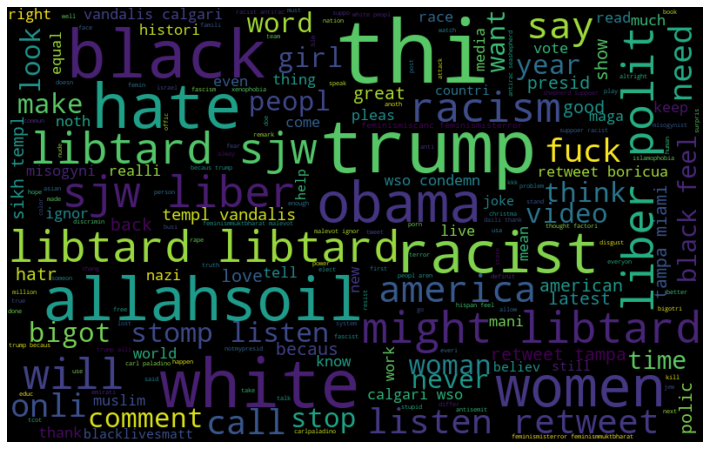

In [15]:
# frequent words visualization for Negative
all_words = ' '.join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud_ = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_,interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# extracting the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # Loop words in the tweets
    for tweet in tweets:
        ht = re.findall(r'#(\w+)',tweet)
        hashtags.append(ht)
    return hashtags

In [17]:
# extract hashtags from non-racist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [18]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [19]:
# unnest the list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [20]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [21]:
# Positive Hashtags list and count
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count':list(freq.values())})

d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


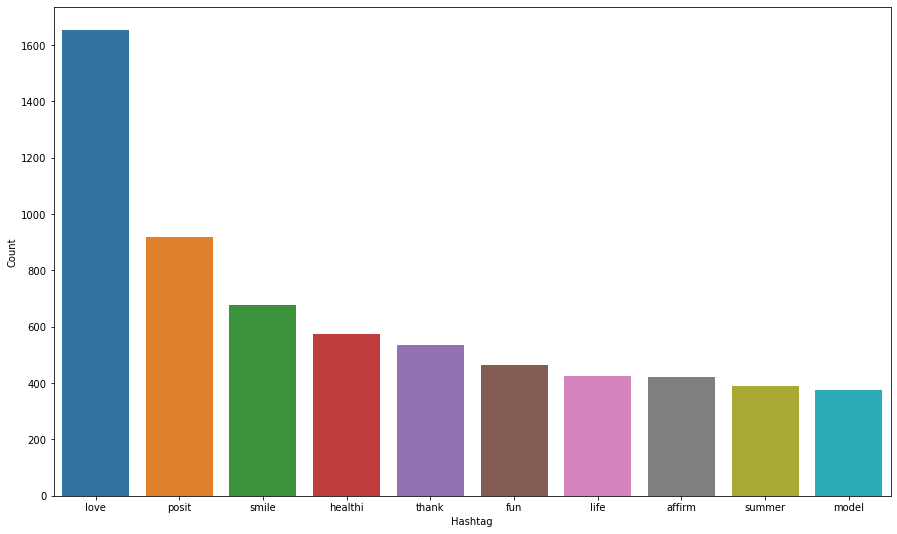

In [22]:
# Select top 10 Positive hashtags
d = d.nlargest(columns='Count', n = 10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x = 'Hashtag', y = 'Count')
plt.show()

In [23]:
# Negative Hashtags list and count
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count':list(freq.values())})

d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


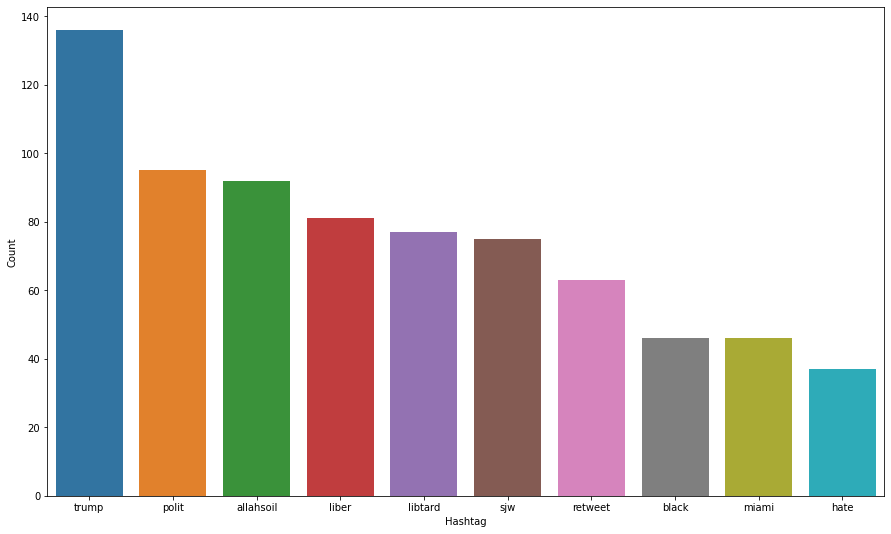

In [24]:
# Select top 10 Negative hashtags
d = d.nlargest(columns='Count', n = 10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x = 'Hashtag', y = 'Count')
plt.show()

# Input Split

In [57]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])

In [58]:
# Splittingof dataset into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tfidf, df['label'],random_state = 42, test_size = 0.25)

# Model Training

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [60]:
# training
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [61]:
# testing
pred = model1.predict(x_test)
f1_score(y_test,pred)

0.47368421052631576

In [62]:
accuracy_score(y_test,pred)

0.9474408709798523

# Bernoulli Naive Bayes

In [63]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score,accuracy_score

In [64]:
# training
model2 = BernoulliNB()
model2.fit(x_train,y_train)

BernoulliNB()

In [66]:
pred2 =  model2.predict(x_test)
f1_score(y_test,pred2)

0.5377532228360957

In [67]:
accuracy_score(y_test,pred2)

0.9371793267425854

# Support Vector Machine

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score

In [69]:
# training
model3 = SVC()
model3.fit(x_train,y_train)

SVC()

In [70]:
pred3 =  model3.predict(x_test)
f1_score(y_test,pred3)

0.5061728395061729

In [71]:
accuracy_score(y_test,pred3)

0.9499436866474784

# K Nearest Neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score

In [72]:
# training
model4 = KNeighborsClassifier()
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
pred4 =  model4.predict(x_test)
f1_score(y_test,pred4)

0.4214372716199756

In [74]:
accuracy_score(y_test,pred4)

0.9405581278938806

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score

In [76]:
# training
model5 = RandomForestClassifier()
model5.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
pred5 =  model5.predict(x_test)
f1_score(y_test,pred5)

0.5893824485373781

In [78]:
accuracy_score(y_test,pred5)

0.9525716430984857

In [36]:
# Print all positive tweets
import emoji
d2 = pd.DataFrame({'Tweets':list(df['clean_tweet'][df['label']==0]),'Sentiment':(emoji.emojize(":grinning_face_with_big_eyes:"))})
d2

,Tweets,Sentiment
0,when father dysfunct selfish drag kid into dys...,😃
1,thank #lyft credit caus they offer wheelchair ...,😃
2,bihday your majesti,😃
3,#model love take with time,😃
4,factsguid societi #motiv,😃
...,...,...
29715,fish tomorrow carnt wait first time year,😃
29716,that youuu,😃
29717,nina turner airwav tri wrap herself mantl genu...,😃
29718,listen song monday morn work,😃


In [38]:
# Display the count of positive tweets
print(len(df['clean_tweet'][df['label']==0]))

29720


In [39]:
# Print all Negative tweets
import emoji
d3 = pd.DataFrame({'Tweets':list(df['clean_tweet'][df['label']==1]),'Sentiment':(emoji.emojize(":enraged_face:"))})
d3

,Tweets,Sentiment
0,#cnn call #michigan middl school build wall ch...,😡
1,comment #australia #opkillingbay #seashepherd ...,😡
2,retweet agre,😡
3,lumpi say prove lumpi,😡
4,unbeliev that centuri need someth like thi aga...,😡
...,...,...
2237,ladi ban from kentucki mall #jcpenni #kentucki,😡
2238,omfg offend mailbox proud #mailboxprid #libera...,😡
2239,have ball hashtag weasel away lumpi toni dipshit,😡
2240,make yourself then anybodi until thank,😡


In [54]:
# Display the count of positive tweets
print(len(df['clean_tweet'][df['label']==1]))

2242
